In [1]:
%load_ext autoreload
%autoreload 2
import sys

# instead of creating a package using setup.py or building from a docker/singularity file,
# import the sister directory of src code to be called on in notebook.
# This keeps the notebook free from code to only hold visualizations and is easier to test
# It also helps keep the state of variables clean such that cells aren't run out of order with a mysterious state
sys.path.append("..")

In [2]:
from src import most_recent_mesonet_data
from src import most_recent_mesonet_time
from src import landtype_describe
from src.plotting_scripts import landtype
import os
import pandas as pd
import cartopy.crs as crs
import cartopy.feature as cfeature

In [3]:
# This will return the most recent data avail on mesonet
# this is my file path
ny_mesonet_data_path = "/home/aevans/nysm/archive/nysm/netcdf/proc"
ok_mesonet_data_path = "/home/aevans/landtype/geoinfo.csv"

In [4]:
# create a dataframe of mesonet data ny
ny_df = most_recent_mesonet_data.current_time_mesonet_df(ny_mesonet_data_path)
ny_df = most_recent_mesonet_time.most_recent_time(ny_df, ny_mesonet_data_path)

/home/aevans/miniconda3/lib/python3.9/site-packages/xarray/backends/plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
Version mismatch: this is the 'cffi' package version 1.15.1, located in '/home/aevans/.local/lib/python3.9/site-packages/cffi/api.py'.  When we import the top-level '_cffi_backend' extension module, we get version 1.16.0, located in '/home/aevans/miniconda3/lib/python3.9/site-packages/_cffi_backend.cpython-39-x86_64-linux-gnu.so'.  The two versions should be equal; check your installation.
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [5]:
ny_df_lons = ny_df["lon"].to_list()
ny_df_lats = ny_df["lat"].to_list()

In [6]:
ny_df

,index,station,time_5M,lat,lon,elev,tair,ta9m,tslo,relh,...,ts05,ts25,ts50,sm05,sm25,sm50,frozen05,frozen25,frozen50,snow_depth
233,233,ADDI,2024-11-04 19:25:00,42.040359,-77.237259,507.614014,11.584400,11.474210,11.692570,49.472851,...,9.000000,9.600000,11.1,0.157,0.259,0.303,0.0,0.0,0.0,-0.001046
521,521,ANDE,2024-11-04 19:25:00,42.182270,-74.801392,518.281982,8.843908,8.481643,8.849857,57.346199,...,8.400000,9.800000,11.3,0.084,0.073,0.065,0.0,0.0,0.0,0.000338
809,809,BATA,2024-11-04 19:25:00,43.019939,-78.135658,276.119995,14.509470,14.645390,14.544730,55.885921,...,9.800000,10.200000,11.6,0.222,0.216,0.214,0.0,0.0,0.0,-0.000997
1097,1097,BEAC,2024-11-04 19:25:00,41.528751,-73.945267,90.159798,13.545550,12.777940,13.548920,51.185200,...,11.100000,11.900000,12.7,0.067,0.084,0.107,0.0,0.0,0.0,-0.001254
1385,1385,BELD,2024-11-04 19:25:00,42.223221,-75.668518,470.369995,11.307380,11.347890,11.399200,49.438358,...,10.200000,10.600000,11.7,0.147,0.253,0.267,0.0,0.0,0.0,0.000691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35369,35369,WFMB,2024-11-04 19:25:00,44.393234,-73.858826,614.598999,6.511322,6.242750,6.553292,45.398300,...,7.179999,11.300000,10.3,0.269,0.232,0.259,0.0,0.0,0.0,-0.000707
35657,35657,WGAT,2024-11-04 19:25:00,43.532410,-75.158600,442.966003,7.717666,7.816014,7.838608,47.638531,...,6.000000,6.579999,8.8,0.155,0.266,0.091,0.0,0.0,0.0,-0.000027
35945,35945,WHIT,2024-11-04 19:25:00,43.485073,-73.423073,36.563801,9.423503,9.280206,9.301261,53.055710,...,7.699999,9.699999,12.1,0.190,0.361,0.254,0.0,0.0,0.0,-0.000453
36233,36233,WOLC,2024-11-04 19:25:00,43.228680,-76.842613,121.219002,13.908230,13.785270,13.945840,44.483131,...,9.600000,9.600000,10.8,0.162,0.027,0.087,0.0,0.0,0.0,-0.001294


In [7]:
# # create a dataframe of mesonet data ok
# ok_df = pd.read_csv(ok_mesonet_data_path)

In [8]:
# ok_df_lons = ok_df["elon"].to_list()
# ok_df_lats = ok_df["nlat"].to_list()

In [9]:
lulc = pd.read_csv("/home/aevans/nwp_bias/src/correlation/data/nlcd_hrrr.csv")

In [10]:
lulc.T

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
site,1,2,3,4,5,6,7,8,9,10,...,117,118,119,120,121,122,123,124,125,126
11,0.229299,0.229329,0.06367,0.178458,0.318674,1.147081,2.497133,0.496625,0.408163,0.0,...,0.152827,0.01274,4.320673,2.316996,0.10182,0.0,8.663524,2.460166,0.038246,3.859873
21,6.292994,5.860619,12.924997,18.3174,5.098789,3.785368,5.389222,4.826181,16.466837,0.076443,...,10.264901,3.694738,4.830487,4.379376,6.707395,1.300025,7.822653,1.147228,6.004589,1.770701
22,0.394904,1.694483,4.686107,18.508604,1.045252,5.544226,2.39521,1.095123,3.456633,4.54835,...,5.272542,1.32501,4.180474,3.704647,1.06911,0.637267,1.401452,2.166985,1.440592,0.535032
23,0.191083,0.458657,3.501846,17.284895,0.140217,2.102982,1.184864,0.101872,1.760204,34.972608,...,2.254203,0.573321,2.204945,3.75557,0.20364,0.267652,0.81539,1.032505,0.280469,0.242038
24,0.025478,0.050962,1.146059,5.608668,0.0,0.35687,0.407695,0.025468,0.076531,60.402599,...,1.808456,0.038221,0.624522,1.298536,0.012728,0.050981,0.076443,0.152964,0.038246,0.038217
31,0.012739,0.076443,0.038202,0.140217,0.0,0.012745,0.382214,0.178276,0.165816,0.0,...,0.178299,0.0,1.376498,0.063654,0.0,0.203926,0.01274,2.625876,0.0,0.063694
41,15.694268,52.210473,4.456895,24.563416,29.407266,9.367831,17.785705,47.867057,51.403061,0.0,...,22.465614,9.733724,39.969411,37.797581,30.69874,77.160336,19.212639,25.098789,32.266701,18.968153
42,4.127389,4.140655,0.038202,0.0,5.621415,0.216671,2.318767,1.171527,0.242347,0.0,...,0.063678,0.293031,3.390263,4.392107,5.434644,14.937548,29.532425,14.926705,0.369709,0.305732
43,25.757962,12.727736,1.62995,0.178458,25.825366,0.127453,12.740476,6.647141,11.147959,0.0,...,2.228732,0.28029,20.201376,4.455761,3.181876,3.696151,5.33826,4.372212,2.677206,0.598726


develop way to add modes

In [11]:
csv_path = "/home/aevans/nwp_bias/src/landtype/data/buffer_30_km"

In [12]:
# these are my csvs for the landtype buffers in the nysm
all_files = os.listdir(csv_path)
csv_files = list(filter(lambda f: f.endswith(".csv"), all_files))

In [13]:
station_list_ny = ny_df["station"].to_list()

In [14]:
# # first mode
# count1_list = [1172235]
# class_name1_list = ['Deciduous Forest']
# value1_list = [41]

# # second mode
# count2_list = [810497]
# class_name2_list = ['Pasture/Hay']
# value2_list = [81]

# #third mode
# count3_list = [649824]
# class_name3_list = ['Mixed Forest']
# value3_list = [43]

# #sums
# sums_list = [3140877]

In [15]:
df_x = pd.read_csv(
    f"/home/aevans/nwp_bias/src/landtype/data/buffer_30_km/extract_csv_nysm/1_csv.csv"
)
the_mode_x = df_x.sort_values(by=["Count"], ascending=False)
sum(the_mode_x["Count"])

3140877

In [16]:
# for i in range(2,127):
#     df = pd.read_csv(f'/home/aevans/landtype/data/buffer_30_km/extract_csv_nysm/{i}_csv.csv')
#     the_mode = df.sort_values(by=['Count'], ascending=False)
#     #first mode
#     first_mode = the_mode.iloc[0]
#     count1 = first_mode['Count'].tolist()
#     class_name1 = first_mode['ClassName']
#     value1 = first_mode['Value'].tolist()
#     count1_list.append(count1)
#     class_name1_list.append(class_name1)
#     value1_list.append(value1)
#     #second mode
#     second_mode = the_mode.iloc[1]
#     count2 = second_mode['Count'].tolist()
#     class_name2 = second_mode['ClassName']
#     value2 = second_mode['Value'].tolist()
#     count2_list.append(count2)
#     class_name2_list.append(class_name2)
#     value2_list.append(value2)
#     #third mode
#     third_mode = the_mode.iloc[2]
#     count3 = third_mode['Count'].tolist()
#     class_name3 = third_mode['ClassName']
#     value3 = third_mode['Value'].tolist()
#     count3_list.append(count3)
#     class_name3_list.append(class_name3)
#     value3_list.append(value3)
#     #sum
#     sums = sum(the_mode['Count'])
#     sums_list.append(sums)

In [17]:
# avg_lulc_ny_30_df = pd.DataFrame()
# avg_lulc_ny_30_df['station'] = station_list_ny
# #first mode
# avg_lulc_ny_30_df['firstmode_count'] = count1_list
# avg_lulc_ny_30_df['firstmode_class'] = class_name1_list
# avg_lulc_ny_30_df['firstmode_val'] = value1_list
# # second mode
# avg_lulc_ny_30_df['secondmode_count'] = count2_list
# avg_lulc_ny_30_df['secondmode_class'] = class_name2_list
# avg_lulc_ny_30_df['secondmode_val'] = value2_list
# #third mode
# avg_lulc_ny_30_df['thirdmode_count'] = count3_list
# avg_lulc_ny_30_df['thirdmode_class'] = class_name3_list
# avg_lulc_ny_30_df['thirdmode_val'] = value3_list
# avg_lulc_ny_30_df['sum_total'] = sums_list
# avg_lulc_ny_30_df.to_csv('/home/aevans/landtype/data/buffer_30_km/avg_lulc_ny_30.csv')

# Oklahoma

In [18]:
# csv_path = "/home/aevans/landtype/data/buffer_30_km/extract_csv_oksm/"

In [19]:
# # these are my csvs for the landtype buffers in the nysm
# all_files = os.listdir(csv_path)
# csv_files = list(filter(lambda f: f.endswith(".csv"), all_files))

In [20]:
# station_list_ok = ok_df["stid"].to_list()

In [21]:
# # first mode
# count1_list_ok = [2056075]
# class_name1_list_ok = ['Grassland/Herbaceous']
# value1_list_ok = [71]

# # second mode
# count2_list_ok = [401186]
# class_name2_list_ok = ['Deciduous Forest']
# value2_list_ok = [41]

# #third mode
# count3_list_ok = [391562]
# class_name3_list_ok = ['Cultivated Crops']
# value3_list_ok = [82]

# #sums
# sums_list_ok = [3140887]

In [22]:
# df_y = pd.read_csv(f'/home/aevans/landtype/data/buffer_30_km/extract_csv_oksm/1_csv.csv')
# the_mode_y = df_y.sort_values(by=['COUNT'], ascending=False)

In [23]:
# for i in range(2,145):
#     df = pd.read_csv(f'/home/aevans/landtype/data/buffer_30_km/extract_csv_oksm/{i}_csv.csv')
#     the_mode = df.sort_values(by=['Count'], ascending=False)
#     #first mode
#     first_mode = the_mode.iloc[0]
#     count1 = first_mode['Count'].tolist()
#     class_name1 = first_mode['ClassName']
#     value1 = first_mode['Value'].tolist()
#     count1_list_ok.append(count1)
#     class_name1_list_ok.append(class_name1)
#     value1_list_ok.append(value1)
#     #second mode
#     second_mode = the_mode.iloc[1]
#     count2 = second_mode['Count'].tolist()
#     class_name2 = second_mode['ClassName']
#     value2 = second_mode['Value'].tolist()
#     count2_list_ok.append(count2)
#     class_name2_list_ok.append(class_name2)
#     value2_list_ok.append(value2)
#     #third mode
#     third_mode = the_mode.iloc[2]
#     count3 = third_mode['Count'].tolist()
#     class_name3 = third_mode['ClassName']
#     value3 = third_mode['Value'].tolist()
#     count3_list_ok.append(count3)
#     class_name3_list_ok.append(class_name3)
#     value3_list_ok.append(value3)
#     #sum
#     sums = sum(the_mode['Count'])
#     sums_list_ok.append(sums)

In [24]:
# avg_lulc_ok_30_df = pd.DataFrame()
# avg_lulc_ok_30_df['station'] = station_list_ok
# #first mode
# avg_lulc_ok_30_df['firstmode_count'] = count1_list_ok
# avg_lulc_ok_30_df['firstmode_class'] = class_name1_list_ok
# avg_lulc_ok_30_df['firstmode_val'] = value1_list_ok
# # second mode
# avg_lulc_ok_30_df['secondmode_count'] = count2_list_ok
# avg_lulc_ok_30_df['secondmode_class'] = class_name2_list_ok
# avg_lulc_ok_30_df['secondmode_val'] = value2_list_ok
# #third mode
# avg_lulc_ok_30_df['thirdmode_count'] = count3_list_ok
# avg_lulc_ok_30_df['thirdmode_class'] = class_name3_list_ok
# avg_lulc_ok_30_df['thirdmode_val'] = value3_list_ok
# avg_lulc_ok_30_df['sum_total'] = sums_list_ok
# avg_lulc_ok_30_df.to_csv('/home/aevans/landtype/data/buffer_30_km/avg_lulc_ok_30.csv')

In [25]:
def format_df(df):
    colors = [
        "black",
        "blue",
        "white",
        "coral",
        "pink",
        "red",
        "magenta",
        "gray",
        "lime",
        "forestgreen",
        "green",
        "olive",
        "brown",
        "slategray",
        "darkorchid",
        "plum",
        "indigo",
        "purple",
        "yellow",
        "gold",
        "orange",
        "cyan",
    ]
    legend = np.array(
        [
            0,
            11,
            12,
            21,
            22,
            23,
            24,
            31,
            41,
            42,
            43,
            45,
            51,
            52,
            71,
            72,
            73,
            74,
            81,
            82,
            90,
            95,
        ]
    )
    leg_str = [
        "No Data",
        "Open Water",
        "Perennial Ice/Snow",
        "Developed, Open Space",
        "Developed, Low Intensity",
        "Developed, Medium Intensity",
        "Developed High Intensity",
        "Barren Land (Rock/Sand/Clay)",
        "Deciduous Forest",
        "Evergreen Forest",
        "Mixed Forest",
        "Forest/Shrub",
        "Dwarf Scrub",
        "Shrub/Scrub",
        "Grassland/Herbaceous",
        "Sedge/Herbaceous",
        "Lichens",
        "Moss",
        "Pasture/Hay",
        "Cultivated Crops",
        "Woody Wetlands",
        "Emergent Herbaceous Wetlands",
    ]

    descripdict = {}
    colordict = {}

    for x, _ in enumerate(colors):
        descripdict.update({legend[x]: leg_str[x]})
        colordict.update({legend[x]: colors[x]})

    df["color"] = df["firstmode_val"].map(colordict)
    df["divide"] = (df["firstmode_count"] / df["sum_total"]) * 100


def plurality_plot(df):
    colors = [
        "black",
        "blue",
        "white",
        "coral",
        "pink",
        "red",
        "magenta",
        "gray",
        "lime",
        "forestgreen",
        "green",
        "olive",
        "brown",
        "slategray",
        "darkorchid",
        "plum",
        "indigo",
        "purple",
        "yellow",
        "gold",
        "orange",
        "cyan",
    ]
    legend = np.array(
        [
            0,
            11,
            12,
            21,
            22,
            23,
            24,
            31,
            41,
            42,
            43,
            45,
            51,
            52,
            71,
            72,
            73,
            74,
            81,
            82,
            90,
            95,
        ]
    )
    leg_str = [
        "No Data",
        "Open Water",
        "Perennial Ice/Snow",
        "Developed, Open Space",
        "Developed, Low Intensity",
        "Developed, Medium Intensity",
        "Developed High Intensity",
        "Barren Land (Rock/Sand/Clay)",
        "Deciduous Forest",
        "Evergreen Forest",
        "Mixed Forest",
        "Forest/Shrub",
        "Dwarf Scrub",
        "Shrub/Scrub",
        "Grassland/Herbaceous",
        "Sedge/Herbaceous",
        "Lichens",
        "Moss",
        "Pasture/Hay",
        "Cultivated Crops",
        "Woody Wetlands",
        "Emergent Herbaceous Wetlands",
    ]

    # legend
    patches = []
    for i, _ in enumerate(colors):
        patch = mpatches.Patch(color=colors[i], label=leg_str[i])
        patches.append(patch)

    projPC = crs.PlateCarree()
    latN = df["lat"].max() + 1
    latS = df["lat"].min() - 1
    lonW = df["lon"].max() + 1
    lonE = df["lon"].min() - 1
    cLat = (latN + latS) / 2
    cLon = (lonW + lonE) / 2
    projLcc = crs.LambertConformal(central_longitude=cLon, central_latitude=cLat)
    print(cLon, cLat)

    fig, ax = plt.subplots(
        figsize=(12, 9), subplot_kw={"projection": crs.PlateCarree()}
    )
    ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle="--")
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.STATES)
    ax.xticklabels_top = False
    ax.ylabels_right = False
    ax.gridlines(
        crs=crs.PlateCarree(),
        draw_labels=True,
        linewidth=2,
        color="black",
        alpha=0.5,
        linestyle="--",
    )
    ax.scatter(
        x=df["lon"],
        y=df["lat"],
        c=df["color"],
        s=df["divide"],
        marker="o",
        transform=crs.PlateCarree(),
    )
    ax.set_title("Mesonet Site Plurality by Landtype", size=16)
    ax.set_xlabel("Longitude", size=14)
    ax.set_ylabel("Latitude", size=14)
    ax.tick_params(axis="x", labelsize=12)
    ax.tick_params(axis="y", labelsize=12)
    ax.grid()
    ax.legend(
        bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0, handles=patches
    )


def percent_plot(df):
    colors = [
        "black",
        "blue",
        "white",
        "coral",
        "pink",
        "red",
        "magenta",
        "gray",
        "lime",
        "forestgreen",
        "green",
        "olive",
        "brown",
        "slategray",
        "darkorchid",
        "plum",
        "indigo",
        "purple",
        "yellow",
        "gold",
        "orange",
        "cyan",
    ]
    legend = np.array(
        [
            0,
            11,
            12,
            21,
            22,
            23,
            24,
            31,
            41,
            42,
            43,
            45,
            51,
            52,
            71,
            72,
            73,
            74,
            81,
            82,
            90,
            95,
        ]
    )
    leg_str = [
        "No Data",
        "Open Water",
        "Perennial Ice/Snow",
        "Developed, Open Space",
        "Developed, Low Intensity",
        "Developed, Medium Intensity",
        "Developed High Intensity",
        "Barren Land (Rock/Sand/Clay)",
        "Deciduous Forest",
        "Evergreen Forest",
        "Mixed Forest",
        "Forest/Shrub",
        "Dwarf Scrub",
        "Shrub/Scrub",
        "Grassland/Herbaceous",
        "Sedge/Herbaceous",
        "Lichens",
        "Moss",
        "Pasture/Hay",
        "Cultivated Crops",
        "Woody Wetlands",
        "Emergent Herbaceous Wetlands",
    ]

    # legend
    patches = []
    for i, _ in enumerate(colors):
        patch = mpatches.Patch(color=colors[i], label=leg_str[i])
        patches.append(patch)

    fig, ax = plt.subplots(figsize=(20, 10))
    ax.scatter(df["station"], df["divide"], c=df["color"], s=50)
    for n in df.iterrows():
        ax.annotate(n[1]["station"], (n[1]["station"], n[1]["divide"]), fontsize=15)
    ax.grid()
    ax.set_ylabel("Percent of Total", size=20)
    ax.tick_params(labelbottom=False, bottom=False)
    ax.legend(
        bbox_to_anchor=(1.05, 1), loc="center left", borderaxespad=0, handles=patches
    )


def stack_bar_df(df):
    # get plurality
    statlist = []
    div_list1 = []
    div_list2 = []
    div_list3 = []
    div_list4 = []
    class1_list = []
    class2_list = []
    class3_list = []

    for x, _ in df.iterrows():
        station = df["station"].iloc[x]
        divide1 = (df["firstmode_count"].iloc[x] / df["sum_total"].iloc[x]) * 100
        class1 = df["firstmode_val"].iloc[x]
        divide2 = (df["secondmode_count"].iloc[x] / df["sum_total"].iloc[x]) * 100
        class2 = df["secondmode_val"].iloc[x]
        divide3 = (df["thirdmode_count"].iloc[x] / df["sum_total"].iloc[x]) * 100
        class3 = df["thirdmode_val"].iloc[x]
        divide4 = 100 - (divide1 + divide2 + divide3)
        statlist_ok.append(station)
        c_list_ok.append(color)
        div_list1.append(divide1)
        div_list2.append(divide2)
        div_list3.append(divide3)
        div_list4.append(divide4)
        class1_list.append(class1)
        class2_list.append(class2)
        class3_list.append(class3)

    stackbar_df = pd.DataFrame()
    stackbar_df["station"] = statlist
    stackbar_df["div1"] = div_list1
    stackbar_df["div2"] = div_list2
    stackbar_df["div3"] = div_list3
    stackbar_df["div4"] = div_list4
    stackbar_df["class1"] = class1_list
    stackbar_df["class2"] = class2_list
    stackbar_df["class3"] = class3_list

    # get colors
    colors = [
        "black",
        "blue",
        "white",
        "coral",
        "pink",
        "red",
        "magenta",
        "gray",
        "lime",
        "forestgreen",
        "green",
        "olive",
        "brown",
        "slategray",
        "darkorchid",
        "plum",
        "indigo",
        "purple",
        "yellow",
        "gold",
        "orange",
        "cyan",
    ]
    legend = np.array(
        [
            0,
            11,
            12,
            21,
            22,
            23,
            24,
            31,
            41,
            42,
            43,
            45,
            51,
            52,
            71,
            72,
            73,
            74,
            81,
            82,
            90,
            95,
        ]
    )
    leg_str = [
        "No Data",
        "Open Water",
        "Perennial Ice/Snow",
        "Developed, Open Space",
        "Developed, Low Intensity",
        "Developed, Medium Intensity",
        "Developed High Intensity",
        "Barren Land (Rock/Sand/Clay)",
        "Deciduous Forest",
        "Evergreen Forest",
        "Mixed Forest",
        "Forest/Shrub",
        "Dwarf Scrub",
        "Shrub/Scrub",
        "Grassland/Herbaceous",
        "Sedge/Herbaceous",
        "Lichens",
        "Moss",
        "Pasture/Hay",
        "Cultivated Crops",
        "Woody Wetlands",
        "Emergent Herbaceous Wetlands",
    ]

    descripdict = {}
    colordict = {}

    for x, _ in enumerate(colors):
        descripdict.update({legend[x]: leg_str[x]})
        colordict.update({legend[x]: colors[x]})

    descripdict = {}
    colordict = {}

    for x, _ in enumerate(colors):
        descripdict.update({legend[x]: leg_str[x]})
        colordict.update({legend[x]: colors[x]})

    stackbar_df["color1"] = stackbar_df["class1"].map(colordict)
    stackbar_df["color2"] = stackbar_df["class2"].map(colordict)
    stackbar_df["color3"] = stackbar_df["class3"].map(colordict)
    stackbar_df["color4"] = "black"
    return stack_bar_df


def plot_stack_bar(df):
    colors = [
        "black",
        "blue",
        "white",
        "coral",
        "pink",
        "red",
        "magenta",
        "gray",
        "lime",
        "forestgreen",
        "green",
        "olive",
        "brown",
        "slategray",
        "darkorchid",
        "plum",
        "indigo",
        "purple",
        "yellow",
        "gold",
        "orange",
        "cyan",
    ]
    legend = np.array(
        [
            0,
            11,
            12,
            21,
            22,
            23,
            24,
            31,
            41,
            42,
            43,
            45,
            51,
            52,
            71,
            72,
            73,
            74,
            81,
            82,
            90,
            95,
        ]
    )
    leg_str = [
        "No Data",
        "Open Water",
        "Perennial Ice/Snow",
        "Developed, Open Space",
        "Developed, Low Intensity",
        "Developed, Medium Intensity",
        "Developed High Intensity",
        "Barren Land (Rock/Sand/Clay)",
        "Deciduous Forest",
        "Evergreen Forest",
        "Mixed Forest",
        "Forest/Shrub",
        "Dwarf Scrub",
        "Shrub/Scrub",
        "Grassland/Herbaceous",
        "Sedge/Herbaceous",
        "Lichens",
        "Moss",
        "Pasture/Hay",
        "Cultivated Crops",
        "Woody Wetlands",
        "Emergent Herbaceous Wetlands",
    ]

    # legend
    patches = []
    for i, _ in enumerate(colors):
        patch = mpatches.Patch(color=colors[i], label=leg_str[i])
        patches.append(patch)
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.set_xlabel("Mesonet Sites")
    ax.set_ylabel("Percet of Total By Landtype")
    ax.set_title("New York")

    for x, _ in df.iterrows():
        df = df.iloc[x]
        h1 = df[1]
        h2 = h1 + df[2]
        h3 = h2 + df[3]
        h4 = h3 + df[4]
        ax.bar(x=x, height=h4, color=df[11])
        ax.bar(x=x, height=h3, color=df[10])
        ax.bar(x=x, height=h2, color=df[9])
        ax.bar(x=x, height=h1, color=df[8])
        ax.legend(
            bbox_to_anchor=(1.05, 1),
            loc="center left",
            borderaxespad=0,
            handles=patches,
        )

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as crs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from matplotlib import colors

LEG_STR = [
    "No Data",
    "Open Water",
    "Perennial Ice/Snow",
    "Developed, Open Space",
    "Developed, Low Intensity",
    "Developed, Medium Intensity",
    "Developed High Intensity",
    "Barren Land (Rock/Sand/Clay)",
    "Deciduous Forest",
    "Evergreen Forest",
    "Mixed Forest",
    "Forest/Shrub",
    "Dwarf Scrub",
    "Shrub/Scrub",
    "Grassland/Herbaceous",
    "Sedge/Herbaceous",
    "Lichens",
    "Moss",
    "Pasture/Hay",
    "Cultivated Crops",
    "Woody Wetlands",
    "Emergent Herbaceous Wetlands",
]
COLORS = [
    "black",
    "blue",
    "white",
    "coral",
    "pink",
    "red",
    "magenta",
    "gray",
    "lime",
    "forestgreen",
    "green",
    "olive",
    "brown",
    "slategray",
    "darkorchid",
    "plum",
    "indigo",
    "purple",
    "yellow",
    "gold",
    "orange",
    "cyan",
]


def create_cmap() -> ListedColormap:
    """
    this creates the landtype colormap

    Returns:
        cmap (ListedColorMap)
    """

    legend = np.array(
        [
            0,
            11,
            12,
            21,
            22,
            23,
            24,
            31,
            41,
            42,
            43,
            45,
            51,
            52,
            71,
            72,
            73,
            74,
            81,
            82,
            90,
            95,
        ]
    )

    colordict = {}
    for x, _ in enumerate(COLORS):
        colordict.update({legend[x]: COLORS[x]})
    return ListedColormap(colordict)


def landtype(df: pd.DataFrame) -> None:
    """
    this plots the landtype for a specified region determined by the imported dataframe

    Args:
        df (pd.DataFrame): landtype, lat, lon
    """
    cmap = create_cmap()

    projPC = crs.PlateCarree()
    latN = df["lat"].max()
    latS = df["lat"].min()
    lonW = df["lon"].max()
    lonE = df["lon"].min()
    cLat = (latN + latS) / 2
    cLon = (lonW + lonE) / 2
    projLcc = crs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

    fig, ax = plt.subplots(
        figsize=(12, 9), subplot_kw={"projection": crs.PlateCarree()}
    )
    ax.legend()
    ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle="--")
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.STATES)
    ax.xticklabels_top = False
    ax.ylabels_right = False
    ax.gridlines(
        crs=crs.PlateCarree(),
        draw_labels=True,
        linewidth=2,
        color="black",
        alpha=0.5,
        linestyle="--",
    )

    plt.scatter(
        df["lon"],
        df["lat"],
        c=df["color"],
        cmap=cmap,
        transform=crs.PlateCarree(),
        zorder=5,
    )

    # legend
    patches = []
    for i, _ in enumerate(COLORS):
        patch = mpatches.Patch(color=COLORS[i], label=LEG_STR[i])
        patches.append(patch)

    plt.legend(
        bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0, handles=patches
    )

In [27]:
avg_lulc_ny_30_df = pd.read_csv(
    "/home/aevans/nwp_bias/src/landtype/data/buffer_30_km/avg_lulc_ny_30.csv"
)
# avg_lulc_ok_30_df = pd.read_csv(
#     "/home/aevans/landtype/data/buffer_30_km/avg_lulc_ok_30.csv"
# )

In [28]:
colors = [
    "black",
    "blue",
    "white",
    "coral",
    "pink",
    "red",
    "magenta",
    "gray",
    "lime",
    "forestgreen",
    "green",
    "olive",
    "brown",
    "slategray",
    "darkorchid",
    "plum",
    "indigo",
    "purple",
    "yellow",
    "gold",
    "orange",
    "cyan",
]
legend = np.array(
    [
        0,
        11,
        12,
        21,
        22,
        23,
        24,
        31,
        41,
        42,
        43,
        45,
        51,
        52,
        71,
        72,
        73,
        74,
        81,
        82,
        90,
        95,
    ]
)
leg_str = [
    "No Data",
    "Open Water",
    "Perennial Ice/Snow",
    "Developed, Open Space",
    "Developed, Low Intensity",
    "Developed, Medium Intensity",
    "Developed High Intensity",
    "Barren Land (Rock/Sand/Clay)",
    "Deciduous Forest",
    "Evergreen Forest",
    "Mixed Forest",
    "Forest/Shrub",
    "Dwarf Scrub",
    "Shrub/Scrub",
    "Grassland/Herbaceous",
    "Sedge/Herbaceous",
    "Lichens",
    "Moss",
    "Pasture/Hay",
    "Cultivated Crops",
    "Woody Wetlands",
    "Emergent Herbaceous Wetlands",
]

descripdict = {}
colordict = {}

for x, _ in enumerate(colors):
    descripdict.update({legend[x]: leg_str[x]})
    colordict.update({legend[x]: colors[x]})


# avg_lulc_ny_30_df["color"] = avg_lulc_ny_30_df["firstmode_val"].map(colordict)
# avg_lulc_ny_30_df["lon"] = ny_df_lons
# avg_lulc_ny_30_df["lat"] = ny_df_lats
i = 0
for k in lulc.keys():
    if k == "site" or k == "station":
        continue
    else:
        lulc[f"color_{i}"] = colordict.get(int(k))
        i += 1

In [29]:
colordict

{0: 'black',
 11: 'blue',
 12: 'white',
 21: 'coral',
 22: 'pink',
 23: 'red',
 24: 'magenta',
 31: 'gray',
 41: 'lime',
 42: 'forestgreen',
 43: 'green',
 45: 'olive',
 51: 'brown',
 52: 'slategray',
 71: 'darkorchid',
 72: 'plum',
 73: 'indigo',
 74: 'purple',
 81: 'yellow',
 82: 'gold',
 90: 'orange',
 95: 'cyan'}

In [30]:
lulc

,site,11,21,22,23,24,31,41,42,43,...,color_5,color_6,color_7,color_8,color_9,color_10,color_11,color_12,color_13,color_14
0,1,0.229299,6.292994,0.394904,0.191083,0.025478,0.012739,15.694268,4.127389,25.757962,...,gray,lime,forestgreen,green,slategray,darkorchid,yellow,gold,orange,cyan
1,2,0.229329,5.860619,1.694483,0.458657,0.050962,0.076443,52.210473,4.140655,12.727736,...,gray,lime,forestgreen,green,slategray,darkorchid,yellow,gold,orange,cyan
2,3,0.063670,12.924997,4.686107,3.501846,1.146059,0.038202,4.456895,0.038202,1.629950,...,gray,lime,forestgreen,green,slategray,darkorchid,yellow,gold,orange,cyan
3,4,0.178458,18.317400,18.508604,17.284895,5.608668,0.140217,24.563416,0.000000,0.178458,...,gray,lime,forestgreen,green,slategray,darkorchid,yellow,gold,orange,cyan
4,5,0.318674,5.098789,1.045252,0.140217,0.000000,0.000000,29.407266,5.621415,25.825366,...,gray,lime,forestgreen,green,slategray,darkorchid,yellow,gold,orange,cyan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,122,0.000000,1.300025,0.637267,0.267652,0.050981,0.203926,77.160336,14.937548,3.696151,...,gray,lime,forestgreen,green,slategray,darkorchid,yellow,gold,orange,cyan
122,123,8.663524,7.822653,1.401452,0.815390,0.076443,0.012740,19.212639,29.532425,5.338260,...,gray,lime,forestgreen,green,slategray,darkorchid,yellow,gold,orange,cyan
123,124,2.460166,1.147228,2.166985,1.032505,0.152964,2.625876,25.098789,14.926705,4.372212,...,gray,lime,forestgreen,green,slategray,darkorchid,yellow,gold,orange,cyan
124,125,0.038246,6.004589,1.440592,0.280469,0.038246,0.000000,32.266701,0.369709,2.677206,...,gray,lime,forestgreen,green,slategray,darkorchid,yellow,gold,orange,cyan


In [31]:
stations = ["BUFF", "WALL", "ANDE", "BRON"]

In [32]:
lulc = lulc[lulc["station"].isin(stations)]
lulc

,site,11,21,22,23,24,31,41,42,43,...,color_5,color_6,color_7,color_8,color_9,color_10,color_11,color_12,color_13,color_14
1,2,0.229329,5.860619,1.694483,0.458657,0.050962,0.076443,52.210473,4.140655,12.727736,...,gray,lime,forestgreen,green,slategray,darkorchid,yellow,gold,orange,cyan
13,14,3.647494,4.323428,8.136717,26.935340,54.010968,1.466650,0.561153,0.076521,0.191302,...,gray,lime,forestgreen,green,slategray,darkorchid,yellow,gold,orange,cyan
16,17,2.600051,32.704563,30.754525,13.510069,5.467754,0.293143,3.492225,0.000000,0.535305,...,gray,lime,forestgreen,green,slategray,darkorchid,yellow,gold,orange,cyan
112,113,0.178458,5.736138,5.366475,2.268961,0.611855,0.025494,14.939452,0.114723,0.420650,...,gray,lime,forestgreen,green,slategray,darkorchid,yellow,gold,orange,cyan


In [33]:
avg_lulc_ny_30_df

,Unnamed: 0,station,firstmode_count,firstmode_class,firstmode_val,secondmode_count,secondmode_class,secondmode_val,thirdmode_count,thirdmode_class,thirdmode_val,sum_total
0,0,ADDI,1172235.0,Deciduous Forest,41,810497.0,Pasture/Hay,81,649824.0,Mixed Forest,43,3140877.0
1,1,ANDE,1957335.0,Deciduous Forest,41,495694.0,Mixed Forest,43,355099.0,Pasture/Hay,81,3140936.0
2,2,BATA,1370969.0,Cultivated Crops,82,506225.0,Deciduous Forest,41,492236.0,Woody Wetlands,90,3140860.0
3,3,BEAC,1500665.0,Deciduous Forest,41,319906.0,Pasture/Hay,81,311170.0,Developed Open Space,21,3140916.0
4,4,BELD,1134915.0,Deciduous Forest,41,824000.0,Mixed Forest,43,562246.0,Pasture/Hay,81,3140934.0
...,...,...,...,...,...,...,...,...,...,...,...,...
121,121,WFMB,1117621.0,Deciduous Forest,41,995143.0,Evergreen Forest,42,516474.0,Mixed Forest,43,3140877.0
122,122,WGAT,1629718.0,Deciduous Forest,41,412308.0,Evergreen Forest,42,349867.0,Woody Wetlands,90,3140895.0
123,123,WHIT,1057058.0,Deciduous Forest,41,590814.0,Evergreen Forest,42,443394.0,Pasture/Hay,81,3140881.0
124,124,WOLC,944078.0,Open Water,11,671635.0,Cultivated Crops,82,580341.0,Deciduous Forest,41,3140871.0


In [34]:
# landtype(avg_lulc_ny_30_df)

In [35]:
# colors = [
#     "black",
#     "blue",
#     "white",
#     "coral",
#     "pink",
#     "red",
#     "magenta",
#     "gray",
#     "lime",
#     "forestgreen",
#     "green",
#     "olive",
#     "brown",
#     "slategray",
#     "darkorchid",
#     "plum",
#     "indigo",
#     "purple",
#     "yellow",
#     "gold",
#     "orange",
#     "cyan",
# ]
# legend = np.array(
#     [
#         0,
#         11,
#         12,
#         21,
#         22,
#         23,
#         24,
#         31,
#         41,
#         42,
#         43,
#         45,
#         51,
#         52,
#         71,
#         72,
#         73,
#         74,
#         81,
#         82,
#         90,
#         95,
#     ]
# )
# leg_str = [
#     "No Data",
#     "Open Water",
#     "Perennial Ice/Snow",
#     "Developed, Open Space",
#     "Developed, Low Intensity",
#     "Developed, Medium Intensity",
#     "Developed High Intensity",
#     "Barren Land (Rock/Sand/Clay)",
#     "Deciduous Forest",
#     "Evergreen Forest",
#     "Mixed Forest",
#     "Forest/Shrub",
#     "Dwarf Scrub",
#     "Shrub/Scrub",
#     "Grassland/Herbaceous",
#     "Sedge/Herbaceous",
#     "Lichens",
#     "Moss",
#     "Pasture/Hay",
#     "Cultivated Crops",
#     "Woody Wetlands",
#     "Emergent Herbaceous Wetlands",
# ]

# descripdict = {}
# colordict = {}

# for x, _ in enumerate(colors):
#     descripdict.update({legend[x]: leg_str[x]})
#     colordict.update({legend[x]: colors[x]})


# avg_lulc_ok_30_df["color"] = avg_lulc_ok_30_df["firstmode_val"].map(colordict)
# avg_lulc_ok_30_df["lon"] = ok_df_lons
# avg_lulc_ok_30_df["lat"] = ok_df_lats

In [36]:
# landtype(avg_lulc_ok_30_df)

In [37]:
avg_lulc_ny_30_df

,Unnamed: 0,station,firstmode_count,firstmode_class,firstmode_val,secondmode_count,secondmode_class,secondmode_val,thirdmode_count,thirdmode_class,thirdmode_val,sum_total
0,0,ADDI,1172235.0,Deciduous Forest,41,810497.0,Pasture/Hay,81,649824.0,Mixed Forest,43,3140877.0
1,1,ANDE,1957335.0,Deciduous Forest,41,495694.0,Mixed Forest,43,355099.0,Pasture/Hay,81,3140936.0
2,2,BATA,1370969.0,Cultivated Crops,82,506225.0,Deciduous Forest,41,492236.0,Woody Wetlands,90,3140860.0
3,3,BEAC,1500665.0,Deciduous Forest,41,319906.0,Pasture/Hay,81,311170.0,Developed Open Space,21,3140916.0
4,4,BELD,1134915.0,Deciduous Forest,41,824000.0,Mixed Forest,43,562246.0,Pasture/Hay,81,3140934.0
...,...,...,...,...,...,...,...,...,...,...,...,...
121,121,WFMB,1117621.0,Deciduous Forest,41,995143.0,Evergreen Forest,42,516474.0,Mixed Forest,43,3140877.0
122,122,WGAT,1629718.0,Deciduous Forest,41,412308.0,Evergreen Forest,42,349867.0,Woody Wetlands,90,3140895.0
123,123,WHIT,1057058.0,Deciduous Forest,41,590814.0,Evergreen Forest,42,443394.0,Pasture/Hay,81,3140881.0
124,124,WOLC,944078.0,Open Water,11,671635.0,Cultivated Crops,82,580341.0,Deciduous Forest,41,3140871.0


In [38]:
avg_lulc_ny_30_df["firstmode_class"].value_counts()

firstmode_class
Deciduous Forest            90
Open Water                  15
Cultivated Crops            12
Pasture/Hay                  3
Developed High Intensity     2
Mixed Forest                 2
Woody Wetlands               1
Evergreen Forest             1
Name: count, dtype: int64

In [39]:
# avg_lulc_ok_30_df["firstmode_class"].value_counts()

In [40]:
# format_df(avg_lulc_ny_30_df)
# format_df(avg_lulc_ok_30_df)

In [41]:
# plurality_plot(avg_lulc_ny_30_df)

In [42]:
# plurality_plot(avg_lulc_ok_30_df)

In [43]:
# percent_plot(avg_lulc_ny_30_df)

In [44]:
# percent_plot(avg_lulc_ok_30_df)

In [45]:
# # get plurality
# statlist = []
# lon_list = []
# lat_list = []
# c_list = []
# div_list = []

# for x, _ in avg_lulc_ny_30_df.iterrows():
#     if avg_lulc_ny_30_df["divide"].iloc[x] > 50:
#         station = avg_lulc_ny_30_df["station"].iloc[x]
#         lons = avg_lulc_ny_30_df["lon"].iloc[x]
#         lats = avg_lulc_ny_30_df["lat"].iloc[x]
#         color = avg_lulc_ny_30_df["color"].iloc[x]
#         divide = avg_lulc_ny_30_df["divide"].iloc[x]
#         statlist.append(station)
#         lon_list.append(lons)
#         lat_list.append(lats)
#         c_list.append(color)
#         div_list.append(divide)

In [46]:
# plur_df = pd.DataFrame()
# plur_df["station"] = statlist
# plur_df["lon"] = lon_list
# plur_df["lat"] = lat_list
# plur_df["color"] = c_list
# plur_df["divide"] = div_list

In [47]:
# plurality_plot(plur_df)

In [48]:
# # get plurality
# statlist_ok = []
# lon_list_ok = []
# lat_list_ok = []
# c_list_ok = []
# div_list_ok = []

# for x, _ in avg_lulc_ok_30_df.iterrows():
#     if avg_lulc_ok_30_df["divide"].iloc[x] > 50:
#         station = avg_lulc_ok_30_df["station"].iloc[x]
#         lons = avg_lulc_ok_30_df["lon"].iloc[x]
#         lats = avg_lulc_ok_30_df["lat"].iloc[x]
#         color = avg_lulc_ok_30_df["color"].iloc[x]
#         divide = avg_lulc_ok_30_df["divide"].iloc[x]
#         statlist_ok.append(station)
#         lon_list_ok.append(lons)
#         lat_list_ok.append(lats)
#         c_list_ok.append(color)
#         div_list_ok.append(divide)

In [49]:
# plur_df_ok = pd.DataFrame()
# plur_df_ok["station"] = statlist_ok
# plur_df_ok["lon"] = lon_list_ok
# plur_df_ok["lat"] = lat_list_ok
# plur_df_ok["color"] = c_list_ok
# plur_df_ok["divide"] = div_list_ok

In [50]:
# plurality_plot(plur_df_ok)

In [51]:
plur_df

NameError: name 'plur_df' is not defined

In [ ]:
avg_lulc_ny_30_df

,Unnamed: 0,station,firstmode_count,firstmode_class,firstmode_val,secondmode_count,secondmode_class,secondmode_val,thirdmode_count,thirdmode_class,thirdmode_val,sum_total
0,0,ADDI,1172235.0,Deciduous Forest,41,810497.0,Pasture/Hay,81,649824.0,Mixed Forest,43,3140877.0
1,1,ANDE,1957335.0,Deciduous Forest,41,495694.0,Mixed Forest,43,355099.0,Pasture/Hay,81,3140936.0
2,2,BATA,1370969.0,Cultivated Crops,82,506225.0,Deciduous Forest,41,492236.0,Woody Wetlands,90,3140860.0
3,3,BEAC,1500665.0,Deciduous Forest,41,319906.0,Pasture/Hay,81,311170.0,Developed Open Space,21,3140916.0
4,4,BELD,1134915.0,Deciduous Forest,41,824000.0,Mixed Forest,43,562246.0,Pasture/Hay,81,3140934.0
...,...,...,...,...,...,...,...,...,...,...,...,...
121,121,WFMB,1117621.0,Deciduous Forest,41,995143.0,Evergreen Forest,42,516474.0,Mixed Forest,43,3140877.0
122,122,WGAT,1629718.0,Deciduous Forest,41,412308.0,Evergreen Forest,42,349867.0,Woody Wetlands,90,3140895.0
123,123,WHIT,1057058.0,Deciduous Forest,41,590814.0,Evergreen Forest,42,443394.0,Pasture/Hay,81,3140881.0
124,124,WOLC,944078.0,Open Water,11,671635.0,Cultivated Crops,82,580341.0,Deciduous Forest,41,3140871.0


In [ ]:
# # get plurality
# statlist_ok = []
# div_list1_ok = []
# div_list2_ok = []
# div_list3_ok = []
# div_list4_ok = []
# class1_list = []
# class2_list = []
# class3_list = []

# for x, _ in avg_lulc_ok_30_df.iterrows():
#     station = avg_lulc_ok_30_df["station"].iloc[x]
#     divide1 = (
#         avg_lulc_ok_30_df["firstmode_count"].iloc[x]
#         / avg_lulc_ok_30_df["sum_total"].iloc[x]
#     ) * 100
#     class1 = avg_lulc_ok_30_df["firstmode_val"].iloc[x]
#     divide2 = (
#         avg_lulc_ok_30_df["secondmode_count"].iloc[x]
#         / avg_lulc_ok_30_df["sum_total"].iloc[x]
#     ) * 100
#     class2 = avg_lulc_ok_30_df["secondmode_val"].iloc[x]
#     divide3 = (
#         avg_lulc_ok_30_df["thirdmode_count"].iloc[x]
#         / avg_lulc_ok_30_df["sum_total"].iloc[x]
#     ) * 100
#     class3 = avg_lulc_ok_30_df["thirdmode_val"].iloc[x]
#     divide4 = 100 - (divide1 + divide2 + divide3)
#     statlist_ok.append(station)
#     c_list_ok.append(color)
#     div_list1_ok.append(divide1)
#     div_list2_ok.append(divide2)
#     div_list3_ok.append(divide3)
#     div_list4_ok.append(divide4)
#     class1_list.append(class1)
#     class2_list.append(class2)
#     class3_list.append(class3)

# stackbar_df_ok = pd.DataFrame()
# stackbar_df_ok["station"] = statlist_ok
# stackbar_df_ok["div1"] = div_list1_ok
# stackbar_df_ok["div2"] = div_list2_ok
# stackbar_df_ok["div3"] = div_list3_ok
# stackbar_df_ok["div4"] = div_list4_ok
# stackbar_df_ok["class1"] = class1_list
# stackbar_df_ok["class2"] = class2_list
# stackbar_df_ok["class3"] = class3_list

In [ ]:
# stackbar_df_ok

In [ ]:
# # get colors
# colors = [
#     "black",
#     "blue",
#     "white",
#     "coral",
#     "pink",
#     "red",
#     "magenta",
#     "gray",
#     "lime",
#     "forestgreen",
#     "green",
#     "olive",
#     "brown",
#     "slategray",
#     "darkorchid",
#     "plum",
#     "indigo",
#     "purple",
#     "yellow",
#     "gold",
#     "orange",
#     "cyan",
# ]
# legend = np.array(
#     [
#         0,
#         11,
#         12,
#         21,
#         22,
#         23,
#         24,
#         31,
#         41,
#         42,
#         43,
#         45,
#         51,
#         52,
#         71,
#         72,
#         73,
#         74,
#         81,
#         82,
#         90,
#         95,
#     ]
# )
# leg_str = [
#     "No Data",
#     "Open Water",
#     "Perennial Ice/Snow",
#     "Developed, Open Space",
#     "Developed, Low Intensity",
#     "Developed, Medium Intensity",
#     "Developed High Intensity",
#     "Barren Land (Rock/Sand/Clay)",
#     "Deciduous Forest",
#     "Evergreen Forest",
#     "Mixed Forest",
#     "Forest/Shrub",
#     "Dwarf Scrub",
#     "Shrub/Scrub",
#     "Grassland/Herbaceous",
#     "Sedge/Herbaceous",
#     "Lichens",
#     "Moss",
#     "Pasture/Hay",
#     "Cultivated Crops",
#     "Woody Wetlands",
#     "Emergent Herbaceous Wetlands",
# ]

# descripdict = {}
# colordict = {}

# for x, _ in enumerate(colors):
#     descripdict.update({legend[x]: leg_str[x]})
#     colordict.update({legend[x]: colors[x]})

# descripdict = {}
# colordict = {}

# for x, _ in enumerate(colors):
#     descripdict.update({legend[x]: leg_str[x]})
#     colordict.update({legend[x]: colors[x]})


# stackbar_df_ok["color1"] = stackbar_df_ok["class1"].map(colordict)
# stackbar_df_ok["color2"] = stackbar_df_ok["class2"].map(colordict)
# stackbar_df_ok["color3"] = stackbar_df_ok["class3"].map(colordict)
# stackbar_df_ok["color4"] = "black"

In [ ]:
# get plurality
statlist = []
div_list1 = []
div_list2 = []
div_list3 = []
div_list4 = []
class1_list_ny = []
class2_list_ny = []
class3_list_ny = []

for x, _ in avg_lulc_ny_30_df.iterrows():
    station = avg_lulc_ny_30_df["station"].iloc[x]
    divide1 = (
        avg_lulc_ny_30_df["firstmode_count"].iloc[x]
        / avg_lulc_ny_30_df["sum_total"].iloc[x]
    ) * 100
    class1 = avg_lulc_ny_30_df["firstmode_val"].iloc[x]
    divide2 = (
        avg_lulc_ny_30_df["secondmode_count"].iloc[x]
        / avg_lulc_ny_30_df["sum_total"].iloc[x]
    ) * 100
    class2 = avg_lulc_ny_30_df["secondmode_val"].iloc[x]
    divide3 = (
        avg_lulc_ny_30_df["thirdmode_count"].iloc[x]
        / avg_lulc_ny_30_df["sum_total"].iloc[x]
    ) * 100
    class3 = avg_lulc_ny_30_df["thirdmode_val"].iloc[x]
    divide4 = 100 - (divide1 + divide2 + divide3)
    statlist.append(station)

    div_list1.append(divide1)
    div_list2.append(divide2)
    div_list3.append(divide3)
    div_list4.append(divide4)
    class1_list_ny.append(class1)
    class2_list_ny.append(class2)
    class3_list_ny.append(class3)

stackbar_df = pd.DataFrame()
stackbar_df["station"] = statlist
stackbar_df["div1"] = div_list1
stackbar_df["div2"] = div_list2
stackbar_df["div3"] = div_list3
stackbar_df["div4"] = div_list4
stackbar_df["class1"] = class1_list_ny
stackbar_df["class2"] = class2_list_ny
stackbar_df["class3"] = class3_list_ny

In [52]:
# get colors
colors = [
    "black",
    "blue",
    "white",
    "coral",
    "pink",
    "red",
    "magenta",
    "gray",
    "lime",
    "forestgreen",
    "green",
    "olive",
    "brown",
    "slategray",
    "darkorchid",
    "plum",
    "indigo",
    "purple",
    "yellow",
    "gold",
    "orange",
    "cyan",
]
legend = np.array(
    [
        0,
        11,
        12,
        21,
        22,
        23,
        24,
        31,
        41,
        42,
        43,
        45,
        51,
        52,
        71,
        72,
        73,
        74,
        81,
        82,
        90,
        95,
    ]
)
leg_str = [
    "No Data",
    "Open Water",
    "Perennial Ice/Snow",
    "Developed, Open Space",
    "Developed, Low Intensity",
    "Developed, Medium Intensity",
    "Developed High Intensity",
    "Barren Land (Rock/Sand/Clay)",
    "Deciduous Forest",
    "Evergreen Forest",
    "Mixed Forest",
    "Forest/Shrub",
    "Dwarf Scrub",
    "Shrub/Scrub",
    "Grassland/Herbaceous",
    "Sedge/Herbaceous",
    "Lichens",
    "Moss",
    "Pasture/Hay",
    "Cultivated Crops",
    "Woody Wetlands",
    "Emergent Herbaceous Wetlands",
]

descripdict = {}
colordict = {}

for x, _ in enumerate(colors):
    descripdict.update({legend[x]: leg_str[x]})
    colordict.update({legend[x]: colors[x]})

descripdict = {}
colordict = {}

for x, _ in enumerate(colors):
    descripdict.update({legend[x]: leg_str[x]})
    colordict.update({legend[x]: colors[x]})


stackbar_df["color1"] = stackbar_df["class1"].map(colordict)
stackbar_df["color2"] = stackbar_df["class2"].map(colordict)
stackbar_df["color3"] = stackbar_df["class3"].map(colordict)
stackbar_df["color4"] = "black"

NameError: name 'stackbar_df' is not defined

In [ ]:
sorted_df = stackbar_df.sort_values(by=["color1"], ascending=True)
stations = ["BUFF", "WALL", "BRON", "ANDE"]
sorted_df = sorted_df[sorted_df["station"].isin(stations)]

In [ ]:
sorted_df_rev = sorted_df.sort_values(by=["div1"], ascending=True)
sorted_df_rev.iloc[:10]

,station,div1,div2,div3,div4,class1,class2,class3,color1,color2,color3,color4
16,BUFF,16.064210,14.058665,13.623432,56.253694,82,90,81,gold,orange,yellow,black
13,BRON,19.688691,19.209024,17.404559,43.697726,24,23,11,magenta,red,blue,black
112,WALL,42.100695,11.855158,10.386822,35.657325,41,81,90,lime,yellow,orange,black
1,ANDE,62.316934,15.781729,11.305515,10.595822,41,43,81,lime,green,yellow,black


In [ ]:
sorted_df

,station,div1,div2,div3,div4,class1,class2,class3,color1,color2,color3,color4
16,BUFF,16.064210,14.058665,13.623432,56.253694,82,90,81,gold,orange,yellow,black
112,WALL,42.100695,11.855158,10.386822,35.657325,41,81,90,lime,yellow,orange,black
1,ANDE,62.316934,15.781729,11.305515,10.595822,41,43,81,lime,green,yellow,black
13,BRON,19.688691,19.209024,17.404559,43.697726,24,23,11,magenta,red,blue,black


In [ ]:
lulc

,site,11,21,22,23,24,31,41,42,43,...,color_5,color_6,color_7,color_8,color_9,color_10,color_11,color_12,color_13,color_14
1,2,0.229329,5.860619,1.694483,0.458657,0.050962,0.076443,52.210473,4.140655,12.727736,...,gray,lime,forestgreen,green,slategray,darkorchid,yellow,gold,orange,cyan
13,14,3.647494,4.323428,8.136717,26.935340,54.010968,1.466650,0.561153,0.076521,0.191302,...,gray,lime,forestgreen,green,slategray,darkorchid,yellow,gold,orange,cyan
16,17,2.600051,32.704563,30.754525,13.510069,5.467754,0.293143,3.492225,0.000000,0.535305,...,gray,lime,forestgreen,green,slategray,darkorchid,yellow,gold,orange,cyan
112,113,0.178458,5.736138,5.366475,2.268961,0.611855,0.025494,14.939452,0.114723,0.420650,...,gray,lime,forestgreen,green,slategray,darkorchid,yellow,gold,orange,cyan


In [ ]:
stations = lulc["station"].tolist()
lulc = lulc.drop(columns=["station", "site"])

In [ ]:
for k in lulc.keys():
    print(k)

11
21
22
23
24
31
41
42
43
52
71
81
82
90
95
color_0
color_1
color_2
color_3
color_4
color_5
color_6
color_7
color_8
color_9
color_10
color_11
color_12
color_13
color_14


In [ ]:
lulc

,11,21,22,23,24,31,41,42,43,52,...,color_5,color_6,color_7,color_8,color_9,color_10,color_11,color_12,color_13,color_14
1,0.229329,5.860619,1.694483,0.458657,0.050962,0.076443,52.210473,4.140655,12.727736,0.930055,...,gray,lime,forestgreen,green,slategray,darkorchid,yellow,gold,orange,cyan
13,3.647494,4.323428,8.136717,26.935340,54.010968,1.466650,0.561153,0.076521,0.191302,0.000000,...,gray,lime,forestgreen,green,slategray,darkorchid,yellow,gold,orange,cyan
16,2.600051,32.704563,30.754525,13.510069,5.467754,0.293143,3.492225,0.000000,0.535305,0.229416,...,gray,lime,forestgreen,green,slategray,darkorchid,yellow,gold,orange,cyan
112,0.178458,5.736138,5.366475,2.268961,0.611855,0.025494,14.939452,0.114723,0.420650,0.254939,...,gray,lime,forestgreen,green,slategray,darkorchid,yellow,gold,orange,cyan


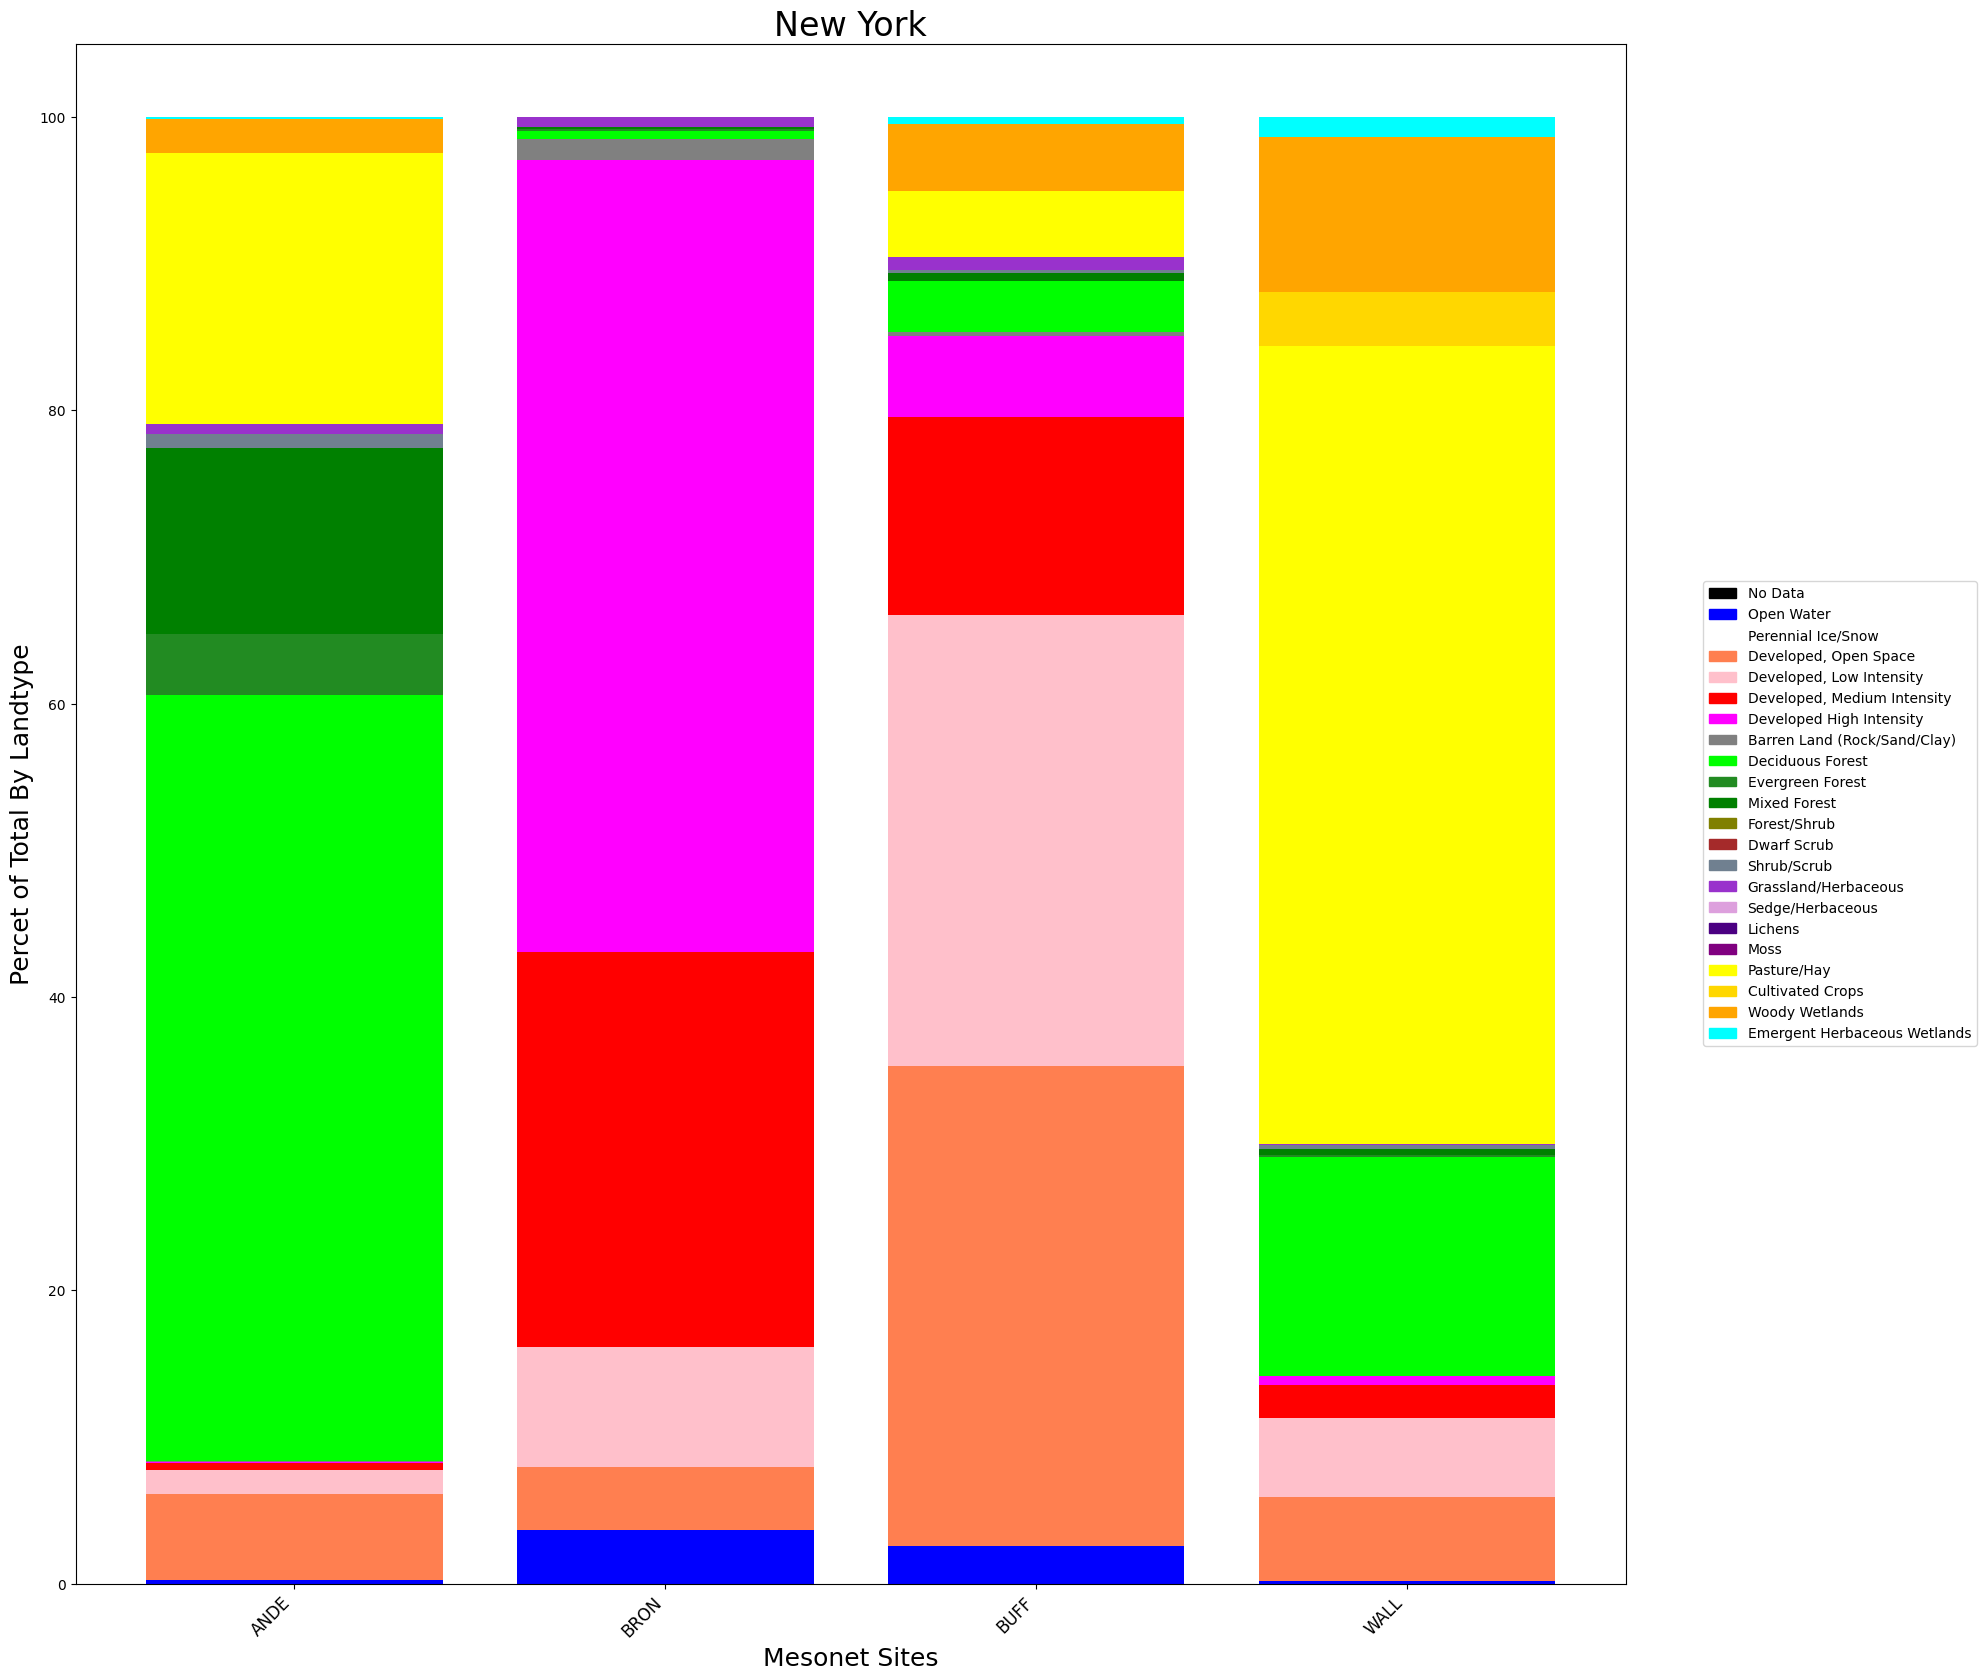

In [ ]:
colors = [
    "black",
    "blue",
    "white",
    "coral",
    "pink",
    "red",
    "magenta",
    "gray",
    "lime",
    "forestgreen",
    "green",
    "olive",
    "brown",
    "slategray",
    "darkorchid",
    "plum",
    "indigo",
    "purple",
    "yellow",
    "gold",
    "orange",
    "cyan",
]
legend = np.array(
    [
        0,
        11,
        12,
        21,
        22,
        23,
        24,
        31,
        41,
        42,
        43,
        45,
        51,
        52,
        71,
        72,
        73,
        74,
        81,
        82,
        90,
        95,
    ]
)
leg_str = [
    "No Data",
    "Open Water",
    "Perennial Ice/Snow",
    "Developed, Open Space",
    "Developed, Low Intensity",
    "Developed, Medium Intensity",
    "Developed High Intensity",
    "Barren Land (Rock/Sand/Clay)",
    "Deciduous Forest",
    "Evergreen Forest",
    "Mixed Forest",
    "Forest/Shrub",
    "Dwarf Scrub",
    "Shrub/Scrub",
    "Grassland/Herbaceous",
    "Sedge/Herbaceous",
    "Lichens",
    "Moss",
    "Pasture/Hay",
    "Cultivated Crops",
    "Woody Wetlands",
    "Emergent Herbaceous Wetlands",
]

# legend
patches = []
for i, _ in enumerate(colors):
    patch = mpatches.Patch(color=colors[i], label=leg_str[i])
    patches.append(patch)
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_xlabel("Mesonet Sites", fontsize=18)
ax.set_ylabel("Percet of Total By Landtype", fontsize=18)
ax.set_title("New York", fontsize=24)


for x, _ in enumerate(lulc["color_0"]):
    df = lulc.iloc[x]
    keys = lulc.keys()
    h1 = df[keys[0]]
    h2 = df[keys[1]] + h1
    h3 = df[keys[2]] + h2
    h4 = df[keys[3]] + h3
    h5 = df[keys[4]] + h4
    h6 = df[keys[5]] + h5
    h7 = df[keys[6]] + h6
    h8 = df[keys[7]] + h7
    h9 = df[keys[8]] + h8
    h10 = df[keys[9]] + h9
    h11 = df[keys[10]] + h10
    h12 = df[keys[11]] + h11
    h13 = df[keys[12]] + h12
    h14 = df[keys[13]] + h13
    h15 = df[keys[14]] + h14

    ax.bar(x=x, height=h15, color=df["color_14"])
    ax.bar(x=x, height=h14, color=df["color_13"])
    ax.bar(x=x, height=h13, color=df["color_12"])
    ax.bar(x=x, height=h12, color=df["color_11"])
    ax.bar(x=x, height=h11, color=df["color_10"])
    ax.bar(x=x, height=h10, color=df["color_9"])
    ax.bar(x=x, height=h9, color=df["color_8"])
    ax.bar(x=x, height=h8, color=df["color_7"])
    ax.bar(x=x, height=h7, color=df["color_6"])
    ax.bar(x=x, height=h6, color=df["color_5"])
    ax.bar(x=x, height=h5, color=df["color_4"])
    ax.bar(x=x, height=h4, color=df["color_3"])
    ax.bar(x=x, height=h3, color=df["color_2"])
    ax.bar(x=x, height=h2, color=df["color_1"])
    ax.bar(x=x, height=h1, color=df["color_0"])

# Set the positions of the ticks
ax.set_xticks(range(len(stations)))

# Set the labels and adjust spacing
ax.set_xticklabels(stations, rotation=45, ha="right", fontsize=12)
ax.legend(
    bbox_to_anchor=(1.05, 0.5), loc="center left", borderaxespad=0, handles=patches
)

In [ ]:
stations

['ANDE', 'BRON', 'BUFF', 'WALL']

In [ ]:
sorted_df_ok = stackbar_df_ok.sort_values(by=["color1"], ascending=True)

In [ ]:
colors = [
    "black",
    "blue",
    "white",
    "coral",
    "pink",
    "red",
    "magenta",
    "gray",
    "lime",
    "forestgreen",
    "green",
    "olive",
    "brown",
    "slategray",
    "darkorchid",
    "plum",
    "indigo",
    "purple",
    "yellow",
    "gold",
    "orange",
    "cyan",
]
legend = np.array(
    [
        0,
        11,
        12,
        21,
        22,
        23,
        24,
        31,
        41,
        42,
        43,
        45,
        51,
        52,
        71,
        72,
        73,
        74,
        81,
        82,
        90,
        95,
    ]
)
leg_str = [
    "No Data",
    "Open Water",
    "Perennial Ice/Snow",
    "Developed, Open Space",
    "Developed, Low Intensity",
    "Developed, Medium Intensity",
    "Developed High Intensity",
    "Barren Land (Rock/Sand/Clay)",
    "Deciduous Forest",
    "Evergreen Forest",
    "Mixed Forest",
    "Forest/Shrub",
    "Dwarf Scrub",
    "Shrub/Scrub",
    "Grassland/Herbaceous",
    "Sedge/Herbaceous",
    "Lichens",
    "Moss",
    "Pasture/Hay",
    "Cultivated Crops",
    "Woody Wetlands",
    "Emergent Herbaceous Wetlands",
]

# legend
patches = []
for i, _ in enumerate(colors):
    patch = mpatches.Patch(color=colors[i], label=leg_str[i])
    patches.append(patch)
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_xlabel("Mesonet Sites")
ax.set_ylabel("Percet of Total By Landtype")
ax.set_title("Oklahoma")

for x, _ in sorted_df_ok.iterrows():
    df = sorted_df_ok.iloc[x]
    h1 = df[1]
    h2 = h1 + df[2]
    h3 = h2 + df[3]
    h4 = h3 + df[4]
    ax.bar(x=x, height=h4, color=df[11])
    ax.bar(x=x, height=h3, color=df[10])
    ax.bar(x=x, height=h2, color=df[9])
    ax.bar(x=x, height=h1, color=df[8])
    ax.legend(
        bbox_to_anchor=(1.05, 1), loc="center left", borderaxespad=0, handles=patches
    )